In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [79]:
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)


In [80]:
gare15 = pd.read_excel('GARE15.xlsx')
zeragem_cotistas = pd.read_excel('acompanhamento_cotistas_oferta.xlsx')

def categorias(cat):
    if cat > 0 and cat <= 1000:
        return 1
    elif cat > 1000 and cat <= 5000:
        return 2
    elif cat > 5000 and cat <=20000:
        return 3
    elif cat > 20000 and cat <= 50000:
        return 4
    elif cat > 50000 and cat <= 100000:
        return 5
    elif cat > 100000 and cat<=500000:
        return 6
    elif cat > 500000 and cat <= 1000000:
        return 7
    elif cat > 1000000 and cat <= 3000000:
        return 8
    elif cat > 3000000 and cat <= 15000000:
        return 9
    elif cat > 15000000:
        return 10
    else:
        return 1
    
map = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}
map_inverso = {'0-1k':1, '1k-5k':2, '5k-20k':3, '20k-50k':4, '50k-100k':5, '100k-500k':6, '500k-1M':7, '1M-3M':8, '3M-15M':9, '>15M':10}

In [81]:
gare15['CATEGORIA_BASE'] = gare15['TOTAL'].apply(categorias)
gare15['CATEGORIA_FINAL'] = gare15['CATEGORIA_BASE'].map(map)

In [82]:
total_cotistas = gare15['DOCUMENTO'].nunique()
total_cotas = gare15['TOTAL'].sum()
print('A emissão teve cerca de {:,.0f} cotistas e foram compradas um total de: {:,.0f} cotas'.format(total_cotistas,total_cotas))

A emissão teve cerca de 3,789 cotistas e foram compradas um total de: 18,793,829 cotas


In [83]:
gare15_cotas = gare15.groupby(by = ['CATEGORIA_BASE', 'PF_PJ'])['TOTAL'].sum().reset_index()
gare15_cotas.set_index('CATEGORIA_BASE')
gare15_cotas['% TOTAL'] = (gare15_cotas['TOTAL']/total_cotas)*100
gare15_cotas['CATEGORIA_FINAL'] = gare15_cotas['CATEGORIA_BASE'].map(map)

In [84]:
gare15_cotas

,CATEGORIA_BASE,PF_PJ,TOTAL,% TOTAL,CATEGORIA_FINAL
0,1,PF,375484,1.997911,0-1k
1,1,PJ,2194,0.011674,0-1k
2,2,PF,5160933,27.460785,1k-5k
3,2,PJ,20616,0.109696,1k-5k
4,3,PF,7305786,38.873324,5k-20k
5,3,PJ,250285,1.331740,5k-20k
6,4,PF,2847767,15.152671,20k-50k
7,4,PJ,271791,1.446172,20k-50k
8,5,PF,626144,3.331647,50k-100k
9,5,PJ,211158,1.123550,50k-100k


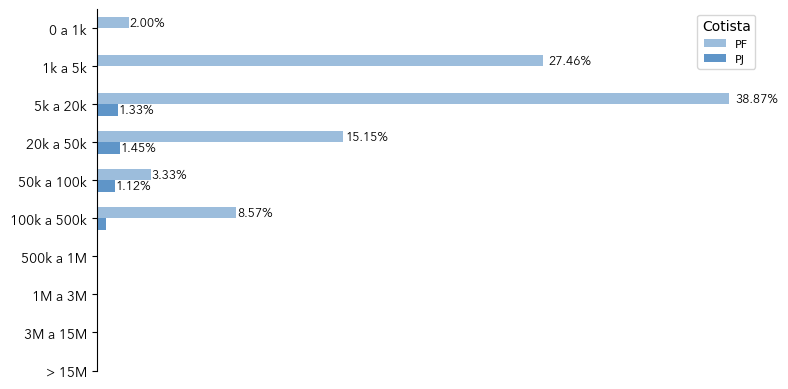

In [85]:
fig, ax = plt.subplots(figsize = (8, 4))

sb.barplot(data= gare15_cotas,
           x = '% TOTAL',
           y = 'CATEGORIA_FINAL',
           hue = 'PF_PJ',
           ax=ax,
           palette={'PF':'#91BDE7', 'PJ':'#4E95D9'},
           dodge=True,
           width = 0.6)


ylabels= [
    '0 a 1k',
    '1k a 5k',
    '5k a 20k',
    '20k a 50k',
    '50k a 100k',
    '100k a 500k',
    '500k a 1M',
    '1M a 3M',
    '3M a 15M',
    '> 15M'
]

ax.set_yticks(range(len(ylabels)))
ax.set_yticklabels(ylabels, fontsize=9, fontproperties = Avenir)
#ax.set_yticklabels(graf['CATEGORIAS'].unique())
#ax.yaxis.set_tick_params(labelsize = (14))

for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x) >= 1:
        ax.text(
            x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{x:.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties=Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)




# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Cotista', loc='upper right', fontsize = 8)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('CATEGORIAS_EMISSÃO.png', transparent = True, dpi=300, bbox_inches='tight')

plt.show()

In [86]:
zeragem_cotistas['CATEGORIA_BASE'] = zeragem_cotistas['CATEGORIAS ANTIGAS'].map(map_inverso)
zeragem_cotistas = zeragem_cotistas.drop(columns  = ['ENTRADA_GALG15', 'Participação'])
zeragem_cotistas

,DOCUMENTO,NOME,PF_PJ,VAR_COTAS,OPERAÇÃO,FINANCEIRO_ATUAL,FINANCEIRO_NOVO,VAR_PRECO,CATEGORIAS ATUAIS,CATEGORIAS ANTIGAS,ENTRADA_GARE15,CATEGORIA_BASE
0,27752631,AMADEU GARCIA DE CARVALHO,PF,-4444,Venda,35552,0,35552,0-1k,20k-50k,GARE15,4
1,102409005,TAISA BELLE,PF,-878,Venda,7024,0,7024,0-1k,5k-20k,GARE15,3
2,430035918,ADRIANA COSTA KOERICH,PF,-2777,Venda,22216,0,22216,0-1k,20k-50k,GARE15,4
3,459196073,RODRIGO BECKER PORTELA,PF,-2222,Venda,17776,0,17776,0-1k,5k-20k,GARE15,3
4,736248021,MATHIAS DE AZEVEDO BUENO,PF,-300,Venda,10888,8488,2400,5k-20k,5k-20k,GARE15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
117,90656172800,LAERCIO ALVES DE SOUZA,PF,-2722,Venda,21776,0,21776,0-1k,20k-50k,GARE15,4
118,92259545068,CIBELE KUHN,PF,-1667,Venda,13336,0,13336,0-1k,5k-20k,GARE15,3
119,92880444004,FABRICIO DE OLIVEIRA,PF,-3333,Venda,26664,0,26664,0-1k,20k-50k,GARE15,4
120,93582560015,ANDREIA LACERDA DUTRA,PF,-2224,Venda,17792,0,17792,0-1k,5k-20k,GARE15,3


In [87]:
total_zeragem_cotas = zeragem_cotistas['VAR_COTAS'].sum()
total_zeragem_venda = zeragem_cotistas['VAR_PRECO'].sum()
print('O total financeiro vendido foi de {:,.0f}, e o total de cotas vendidas foram {:,.0f} cotas'.format(total_zeragem_venda,total_zeragem_cotas))

O total financeiro vendido foi de 5,511,808, e o total de cotas vendidas foram -688,976 cotas


In [88]:
gare15_zeragem = zeragem_cotistas.groupby(by = ['CATEGORIA_BASE', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()
gare15_zeragem.set_index('CATEGORIA_BASE')
gare15_zeragem['% TOTAL'] = (gare15_zeragem['VAR_PRECO']/total_zeragem_venda)*100
gare15_zeragem['CATEGORIA_FINAL'] = gare15_zeragem['CATEGORIA_BASE'].map(map)

In [89]:
gare15_zeragem

,CATEGORIA_BASE,PF_PJ,VAR_PRECO,% TOTAL,CATEGORIA_FINAL
0,2,PF,12888,0.233825,1k-5k
1,3,PF,582664,10.571196,5k-20k
2,4,PF,1326000,24.057442,20k-50k
3,5,PF,1193280,21.649520,50k-100k
4,5,PJ,88640,1.608184,50k-100k
5,6,PF,2308336,41.879833,100k-500k


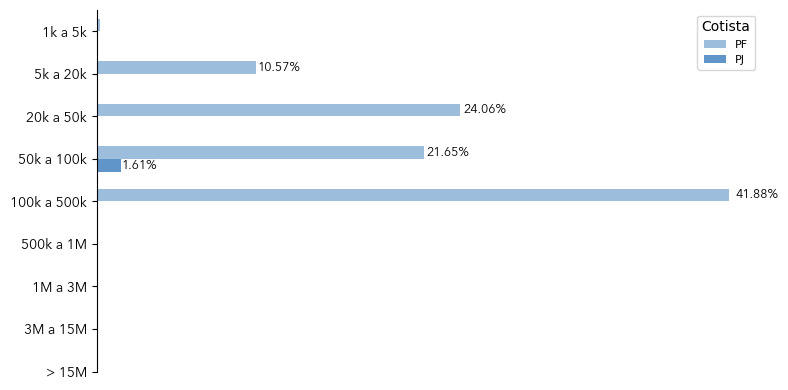

In [90]:
fig, ax = plt.subplots(figsize = (8, 4))

sb.barplot(data= gare15_zeragem,
           x = '% TOTAL',
           y = 'CATEGORIA_FINAL',
           hue = 'PF_PJ',
           ax=ax,
           palette={'PF':'#91BDE7', 'PJ':'#4E95D9'},
           dodge=True,
           width = 0.6)


ylabels= [
    
    '1k a 5k',
    '5k a 20k',
    '20k a 50k',
    '50k a 100k',
    '100k a 500k',
    '500k a 1M',
    '1M a 3M',
    '3M a 15M',
    '> 15M'
]

ax.set_yticks(range(len(ylabels)))
ax.set_yticklabels(ylabels, fontsize=9, fontproperties = Avenir)
#ax.set_yticklabels(graf['CATEGORIAS'].unique())
#ax.yaxis.set_tick_params(labelsize = (14))

for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x) >= 1:
        ax.text(
            x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{x:.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            fontproperties=Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)




# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Cotista', loc='upper right', fontsize = 8)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDAS_EMISSÃO.png', transparent = True, dpi=300, bbox_inches='tight')

plt.show()